# Tensorflow 2를 활용한 CNN 실습
이번 실습에서는 Tensorflow 2를 활용하여 간단한 Convolutional Neural Network(CNN)을 직접 생성해 본다.<br>
간단한 이미지 데이터인 CIFAR10 dataset을 이용하여 이미지를 구분하는 모델을 만들어 볼 것이다. <br>
먼저 Tensorflow를 Import한다.

In [30]:
import tensorflow as tf

## Dataset 불러오기
Tensorflow에서는 CIFAR10 dataset을 불러오기 편하도록 Library에 기본 함수로 지정해 두었다. 아래 명령어를 수행하여 데이터셋을 로드하고, Train/Test set으로 구분해 주자.<br>
CIFAR10는 총 10개의 class가 있고, 각 이미지별로 0~9의 Label이 지정되어 있다. 0은 airplane, 1은 automobile,..에 해당하고, 이를 식별하기 쉽게 class_names에 저장해 두자.

In [69]:
cifar10 = tf.keras.datasets.cifar10

#Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터를 보고 싶으면 matplotlib를 이용하여 확인할 수 있다.

In [70]:
import matplotlib.pyplot as plt

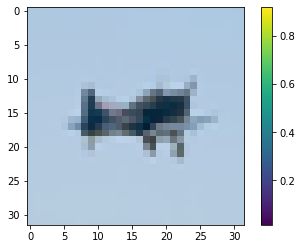

In [76]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [77]:
y_train[2]

array([0], dtype=uint8)

## Model 구성하기
이제 간단한 CNN을 구성해 볼 것이다.
이전 실습과 마찬가지로 keras의 sequential method를 사용하면 원하는 Layer를 차곡차곡 쌓아가면서 모델을 구성할 수 있다. <br>
다만 이번에는 Conv2D layer와 MaxPool2D Layer를 추가적으로 사용한다. <br>
Conv2D를 사용할 때에는 Kerner의 사이즈와, Output의 채널(필터) 개수를 입력해 주어야 한다. padding="same"으로 입력하면 Input과 Output의 사이즈가 같아지도록 자동으로 패딩을 넣어준다. <br>


In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(32,32,3)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')  
])

다음으로 Loss, Optimizer, Metrics등을 정의하여 모델을 컴파일해준다.
10개 중 하나로 Classification하는 문제이므로 SparseCategoricalCrossentropy를 Loss로 사용해준다.

In [26]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [27]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                81930     
Total params: 157,578
Trainable params: 157,578
Non-trainable params: 0
________________________________________________

## 모델 트레이닝
model.fit 명령어를 이용하면 우리가 구성한 모델을 트레이닝할 수 있다.

In [29]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1250/1250 [==============================] - 61s 49ms/step - loss: 1.6273 - accuracy: 0.4169 - val_loss: 1.1480 - val_accuracy: 0.5949
Epoch 2/10
1250/1250 [==============================] - 68s 54ms/step - loss: 1.0541 - accuracy: 0.6328 - val_loss: 1.0164 - val_accuracy: 0.6495
Epoch 3/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.8789 - accuracy: 0.6995 - val_loss: 0.9177 - val_accuracy: 0.6832
Epoch 4/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.7868 - accuracy: 0.7302 - val_loss: 0.8665 - val_accuracy: 0.7019
Epoch 5/10
1250/1250 [==============================] - 64s 51ms/step - loss: 0.6998 - accuracy: 0.7616 - val_loss: 0.9003 - val_accuracy: 0.6996
Epoch 6/10
1250/1250 [==============================] - 63s 50ms/step - loss: 0.6310 - accuracy: 0.7832 - val_loss: 0.9221 - val_accuracy: 0.6962
Epoch 7/10
1250/1250 [==============================] - 68s 55ms/step - loss: 0.5758 - accuracy: 0.7994 - val_loss: 0.9084 -

## 트레이닝 결과 확인
트레이닝이 진행됨에 따라 Loss는 줄어들고 Accuracy는 올라가야 할 것입니다.<br>
이런 트렌드가 관찰되지 않는다면 무언가 잘못되었다고 볼 수 있습니다. <br>
그래프를 그려서 실제로 이런 트렌드가 관찰되는지 확인해 봅시다.

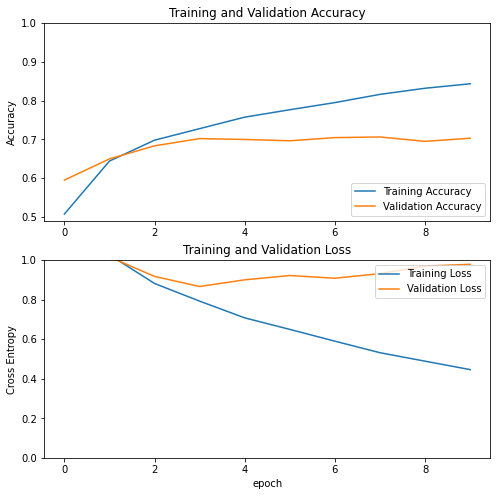

In [32]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Test set에 대해서도 Accuracy가 잘 나오는지 확인해 보자.

In [33]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 4s - loss: 0.9806 - accuracy: 0.6974


[0.9806382656097412, 0.6973999738693237]

Test set에서 하나의 샘플을 추출하여 정답과 예측 결과를 비교해 볼 수도 있다.

In [34]:
predictions = model.predict(x_test)

In [42]:
import numpy as np
#Plot image with label
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
#Plot 
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i][0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  _ = plt.xticks(range(10), class_names, rotation=45)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

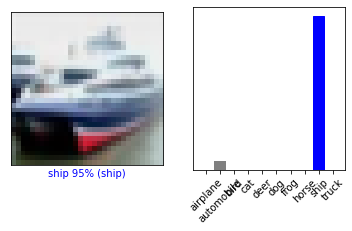

In [47]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

# 과제: CIFAR100 데이터셋을 이용하여 CNN 모델 만들고 훈련시키기



In [49]:
cifar100 = tf.keras.datasets.cifar100

#Load data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

#Split train set into train/valid set
from sklearn import model_selection
x_train, x_valid, y_train, y_valid = model_selection.train_test_split(x_train, y_train,test_size=0.2)

#Rescale data to be in the range of [0,1]
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0
class_names = ['beaver', 'dolphin', 'otter', 'seal', 'whale', 
                'aquarium fish', 'flatfish', 'ray', 'shark', 'trout', 
                'orchids', 'poppies', 'roses', 'sunflowers', 'tulips', 
                'bottles', 'bowls', 'cans', 'cups', 'plates', 
                'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers', 
                'clock', 'computer keyboard', 'lamp', 'telephone', 'television', 
                'bed', 'chair', 'couch', 'table', 'wardrobe', 
                'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach', 
                'bear', 'leopard', 'lion', 'tiger', 'wolf', 
                'bridge', 'castle', 'house', 'road', 'skyscraper', 
                'cloud', 'forest', 'mountain', 'plain', 'sea', 
                'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo', 
                'fox', 'porcupine', 'possum', 'raccoon', 'skunk', 
                'crab', 'lobster', 'snail', 'spider', 'worm', 
                'baby', 'boy', 'girl', 'man', 'woman', 
                'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle', 
                'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel', 
                'maple', 'oak', 'palm', 'pine', 'willow', 
                'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train', 
                'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

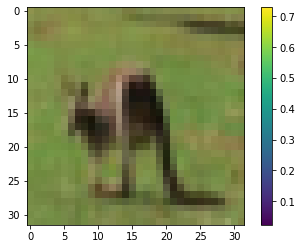

In [50]:
#Let's look at the sample data
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [68]:
y_train[0][0]

38

In [62]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape=(32,32,3)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
  tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
  tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(100, activation='softmax')  
])

In [63]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [64]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [65]:
hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1250/1250 [==============================] - 239s 190ms/step - loss: 4.3368 - accuracy: 0.0402 - val_loss: 3.5119 - val_accuracy: 0.1738
Epoch 2/10
1250/1250 [==============================] - 252s 202ms/step - loss: 3.2625 - accuracy: 0.2145 - val_loss: 2.9845 - val_accuracy: 0.2731
Epoch 3/10
1250/1250 [==============================] - 265s 212ms/step - loss: 2.6753 - accuracy: 0.3300 - val_loss: 2.8183 - val_accuracy: 0.3101
Epoch 4/10
1250/1250 [==============================] - 233s 186ms/step - loss: 2.2966 - accuracy: 0.4092 - val_loss: 2.7453 - val_accuracy: 0.3241
Epoch 5/10
1250/1250 [==============================] - 263s 211ms/step - loss: 1.9870 - accuracy: 0.4770 - val_loss: 2.7248 - val_accuracy: 0.3488
Epoch 6/10
1250/1250 [==============================] - 247s 197ms/step - loss: 1.6991 - accuracy: 0.5419 - val_loss: 2.7063 - val_accuracy: 0.3573
Epoch 7/10
1250/1250 [==============================] - 242s 193ms/step - loss: 1.4531 - accuracy: 0.6006 - val_

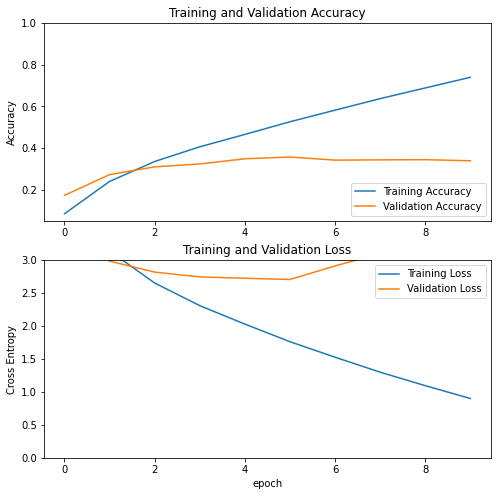

In [66]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()